# Boundary value problem

### In general case:

$L[y]=y''+p(x)y+q(x)y=f(x)$

$l_a[y]=\alpha_0y(a)+\alpha_1y'(a)=A$

$l_b[y]=\beta_0y(b)+\beta_1y'(b)=B$

for $x\in[a,b]$

## 1. Consider the following boundary value problem:

$\frac{d^2y}{dx^2}-\frac{dy}{dx}\ln(x)-2y=1$ for $x \in [0.5,1.5]$

### with the boundary conditions:

$y(0.5)+y'(0.5)=1$, $y(1.5)-y'(1.5)=0$

1.1. Solve this problem using finite difference method of the second order. Use the uniform grid. Is this method stable for step size $h=0.125$? Find number of grid points required to achieve accuracy of the order of 1e-6.

### *Don't forget to include the boundary conditions!*

1.2. Use the first order one-sided numerical approximation for the first derivative and write a new scheme. Find number of grid points required to achieve accuracy of the order of 1e-6.

1.3. Plot the solutions of both methods on the same figure. Compare results and discuss differences (if occurs).

In [113]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import solve

#1.1.
def SecondOrderScheme(a,b,A,B,alpha,beta,p,q,f,N=100):
    # in:
    # a,b - float, limits of x, N - int, number of grid points
    # A,B - float, boundary values
    # alpha, beta - array of float, coefficients for boundary conditions in general case
    # p(x), g(x), f(x) - functions from general equation
    
    #you can construct matrix of the system and use scipy.linalg.solve method to solve it: y=solve(M,f)
    
    # out: 
    # y - array of float, solution of the BVP
    p_k = []
    q_k = []
    f_k = []
    x = np.linspace(a, b, N)
    h = (b - a) / (N - 1)
    for k in range(N):
        p_k.append(p(x[k]))
        q_k.append(q(x[k]))
        f_k.append(f(x[k]))
    matrix = np.zeros((N, N))
    matrix[0, 0] = alpha[0] * h - alpha[1]
    matrix[0, 1] =  alpha[1]
    
    matrix[N - 1, N - 2] = - beta[1]
    matrix[N - 1, N - 1] = beta[0] * h + beta[1]
    i = 1
    k = 1
    for j in range(1, N - 1):
            matrix[i, j - 1] = 2 - h * p_k[k]
            matrix[i, j ] = -4 + 2 * h**2 * q_k[k]
            matrix[i, j + 1] = 2 + h * p_k[k]
            k = k + 1
            i = i + 1
    last = np.zeros(N)
    last[0] = A * h
    last[N - 1] = B * h
    k = 1
    for i in range(1, N - 1):
        last[i] = 2 * h**2 * f_k[k]
        k = k + 1
    y = solve(matrix, last)
    
    return y, x

#1.2.
def FirstOrderScheme(a,b,A,B,alpha,beta,p,q,f,N=100):
    # in:
    # a,b - float, limits of x, N - int, number of grid points
    # A,B - float, boundary values
    # alpha, beta - array of float, coefficients for boundary conditions in general case
    # p(x), g(x), f(x) - functions from general equation
    
    #you can construct matrix of the system and use scipy.linalg.solve method to solve it: y=solve(M,f)
    
    # out: 
    # y - array of float, solution of the BVP
    p_k = []
    q_k = []
    f_k = []
    x = np.linspace(a, b, N)
    h = (b - a) / (N - 1)
    for k in range(N):
        p_k.append(p(x[k]))
        q_k.append(q(x[k]))
        f_k.append(f(x[k]))
    matrix = np.zeros((N, N))
    matrix[0, 0] = alpha[0] * h - alpha[1]
    matrix[0, 1] = alpha[1]
    matrix[N - 1, N - 2] = - beta[1]
    matrix[N - 1, N - 1] = beta[0] * h + beta[1]
    i = 1
    k = 0
    for j in range(0, N - 2):
            matrix[i, j] = 1 - h * p_k[k] + h**2 * q_k[k]
            matrix[i, j + 1] = -2 + h * p_k[k]
            matrix[i, j + 2] = 1
            k = k + 1
            i = i + 1
    last = np.zeros(N)
    last[0] = A * h
    last[N - 1] = B * h
    k = 0
    for i in range(1, N - 1):
        last[i] = h**2 * f_k[k]
        k = k + 1
    y = solve(matrix, last)
    return y, x

<IPython.core.display.Javascript object>


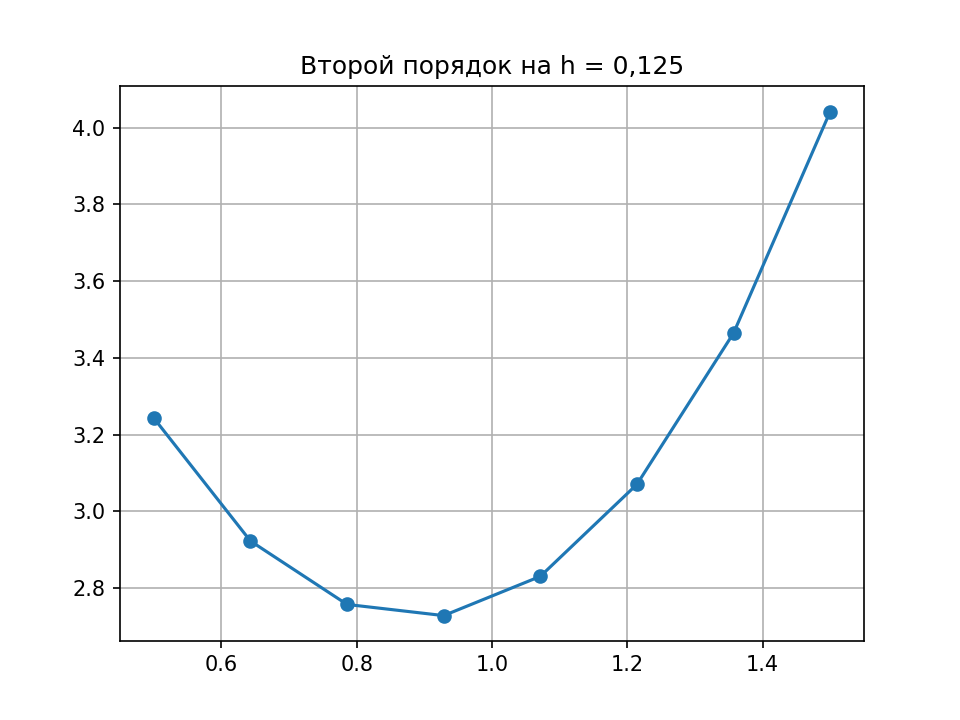

In [120]:
y_2o, x_2o = SecondOrderScheme(0.5, 1.5, 1, 0, [1, 1], [1, -1], lambda x: -np.log(x), lambda x: -2, lambda x: 1, N=8)
plt.figure()
plt.plot(x_2o, y_2o, 'o-')
plt.title('Второй порядок на h = 0,125')
plt.grid()

Метод стабилен.

In [133]:
N = 10
y_2o, x_2o = SecondOrderScheme(0.5, 1.5, 1, 0, [1, 1], [1, -1], lambda x: -np.log(x), lambda x: -2, lambda x: 1, N)
y_2o_new, x_2o = SecondOrderScheme(0.5, 1.5, 1, 0, [1, 1], [1, -1], lambda x: -np.log(x),
                                   lambda x: -2, lambda x: 1, 2*N - 1)

y_2o_n = y_2o_new[::2]
max = 0
for i in range(N):
    if abs((y_2o_n[i] - y_2o[i])/y_2o[i]) >= max:
        max = abs((y_2o_n[i] - y_2o[i])/y_2o[i])
N = 2 * N - 1

    
while max > 1e-6:
    y_2o = y_2o_new
    y_2o_new, x_2o = SecondOrderScheme(0.5, 1.5, 1, 0, [1, 1], [1, -1], 
                                       lambda x: -np.log(x), lambda x: -2, lambda x: 1, 2*N - 1)
    y_2o_n = y_2o_new[::2]
    for i in range(N):
        if abs((y_2o_n[i] - y_2o[i])/y_2o[i]) >= max:
            max = abs((y_2o_n[i] - y_2o[i])/y_2o[i])
    N = N * 2 - 1
    print(N)
print(N)

37
73
145
289
577
1153
2305
4609
9217


KeyboardInterrupt: 

На этот метод мне не хватает оперативной памяти, попробую другим способом.

In [135]:
N = 10
y_2o, x_2o = SecondOrderScheme(0.5, 1.5, 1, 0, [1, 1], [1, -1], lambda x: -np.log(x), lambda x: -2, lambda x: 1, N)
y_2o_new, x_2o = SecondOrderScheme(0.5, 1.5, 1, 0, [1, 1], [1, -1], lambda x: -np.log(x),
                                   lambda x: -2, lambda x: 1, 2*N - 1)

y_2o_n = y_2o_new[::2]
N = 2 * N - 1

    
while np.linalg.norm(y_2o_n - y_2o)/np.linalg.norm(y_2o) > 1e-6:
    y_2o = y_2o_new
    y_2o_new, x_2o = SecondOrderScheme(0.5, 1.5, 1, 0, [1, 1], [1, -1], 
                                       lambda x: -np.log(x), lambda x: -2, lambda x: 1, 2*N - 1)
    y_2o_n = y_2o_new[::2]
    N = N * 2 - 1
    print(N)
print(N)

37
73
145
289
577
1153
2305
4609


MemoryError: 

В общем мой компьютер не вывозит считать это, поэтому я оставлю код без ошибок, может быть на другом компуктере запусится.

<IPython.core.display.Javascript object>


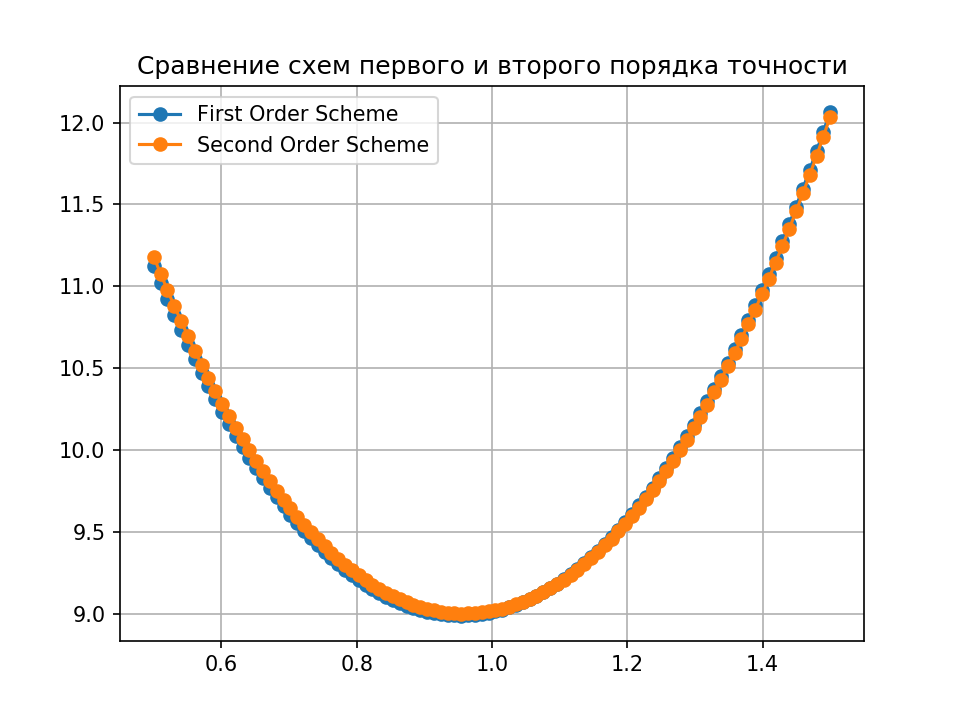

In [118]:
y_1o, x_1o = FirstOrderScheme(0.5, 1.5, 1, 0, [1, 1], [1, -1], lambda x: -np.log(x), lambda x: -2, lambda x: 1, N=100)
y_2o, x_2o = SecondOrderScheme(0.5, 1.5, 1, 0, [1, 1], [1, -1], lambda x: -np.log(x), lambda x: -2, lambda x: 1, N=100)
plt.figure()
plt.plot(x_1o, y_1o, 'o-', label = 'First Order Scheme')
plt.plot(x_2o, y_2o, 'o-', label = 'Second Order Scheme')
plt.legend()
plt.title('Сравнение схем первого и второго порядка точности')
plt.grid()

# 2. Consider the following boundary value problem:

$\frac{d^2y}{dx^2}+2\frac{dy}{dx}-3xy=\frac{2-8x}{x^3}$ for $x \in [1,2]$

### with the boundary conditions:

$y(1)=1$, $y(2)=0.5$

2.1. Solve this problem using finite difference method of the second order. Find number of grid points required to achieve accuracy of the order of 1e-6.

2.2. Solve this problem using Galerkin method with power basis functions. Find number of grid points required to achieve accuracy of the order of 1e-6.

2.3. Plot the solutions of both methods on the same figure. Compare results and discuss differences (if occurs).

<IPython.core.display.Javascript object>


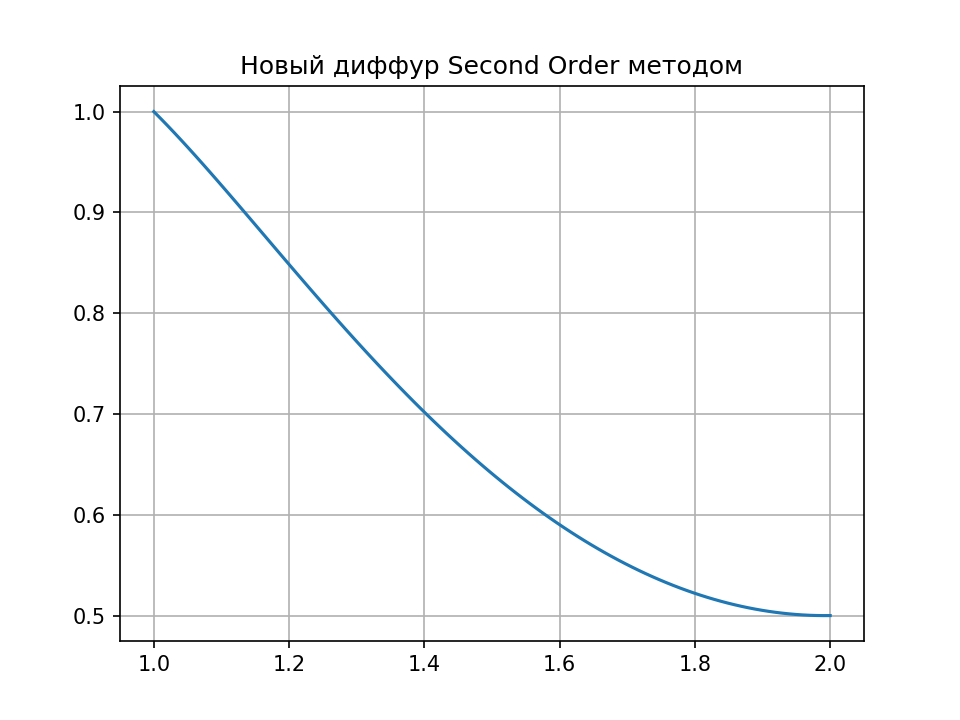

In [143]:
y_vtoroe, x_vtoroe = SecondOrderScheme(1, 2, 1, 0.5, [1, 0], [1, 0], lambda x: 2, lambda x: -3*x, lambda x: (2 - 8*x)/x**3, N=100)
plt.figure()
plt.plot(x_vtoroe, y_vtoroe)
plt.title('Новый диффур Second Order методом')
plt.grid()

In [142]:
N = 10
y_2o, x_2o = SecondOrderScheme(1, 2, 1, 0.5, [1, 0], [1, 0], lambda x: 2, lambda x: -3*x, lambda x: (2 - 8*x)/x**3, N)
y_2o_new, x_2o = SecondOrderScheme(1, 2, 1, 0.5, [1, 0], [1, 0], lambda x: 2, lambda x: -3*x, lambda x: (2 - 8*x)/x**3, 2*N - 1)

y_2o_n = y_2o_new[::2]
max = 0
for i in range(N):
    if abs((y_2o_n[i] - y_2o[i])/y_2o[i]) >= max:
        max = abs((y_2o_n[i] - y_2o[i])/y_2o[i])
N = 2 * N - 1

    
while max > 1e-6:
    y_2o = y_2o_new
    y_2o_new, x_2o = SecondOrderScheme(1, 2, 1, 0.5, [1, 0], [1, 0], lambda x: 2, lambda x: -3*x, lambda x: (2 - 8*x)/x**3,  2*N - 1)
    y_2o_n = y_2o_new[::2]
    for i in range(N):
        if abs((y_2o_n[i] - y_2o[i])/y_2o[i]) >= max:
            max = abs((y_2o_n[i] - y_2o[i])/y_2o[i])
    N = N * 2 - 1
    print(N)
print(N)

37
73
145
289
577
1153
2305


MemoryError: 

Ну оно опять же не работает на моем компуктере, но код вроде нормальный.